<a href="https://colab.research.google.com/github/Sajuranjith/Indian-Personal-Finance-and-Spending-Habits/blob/main/Indian_Personal_Finance_and_Spending_Habits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Indian Personal Finance and Spending Habits**

**Name: Saju.T**

**Organization: Entri Elevate**

**Date:**

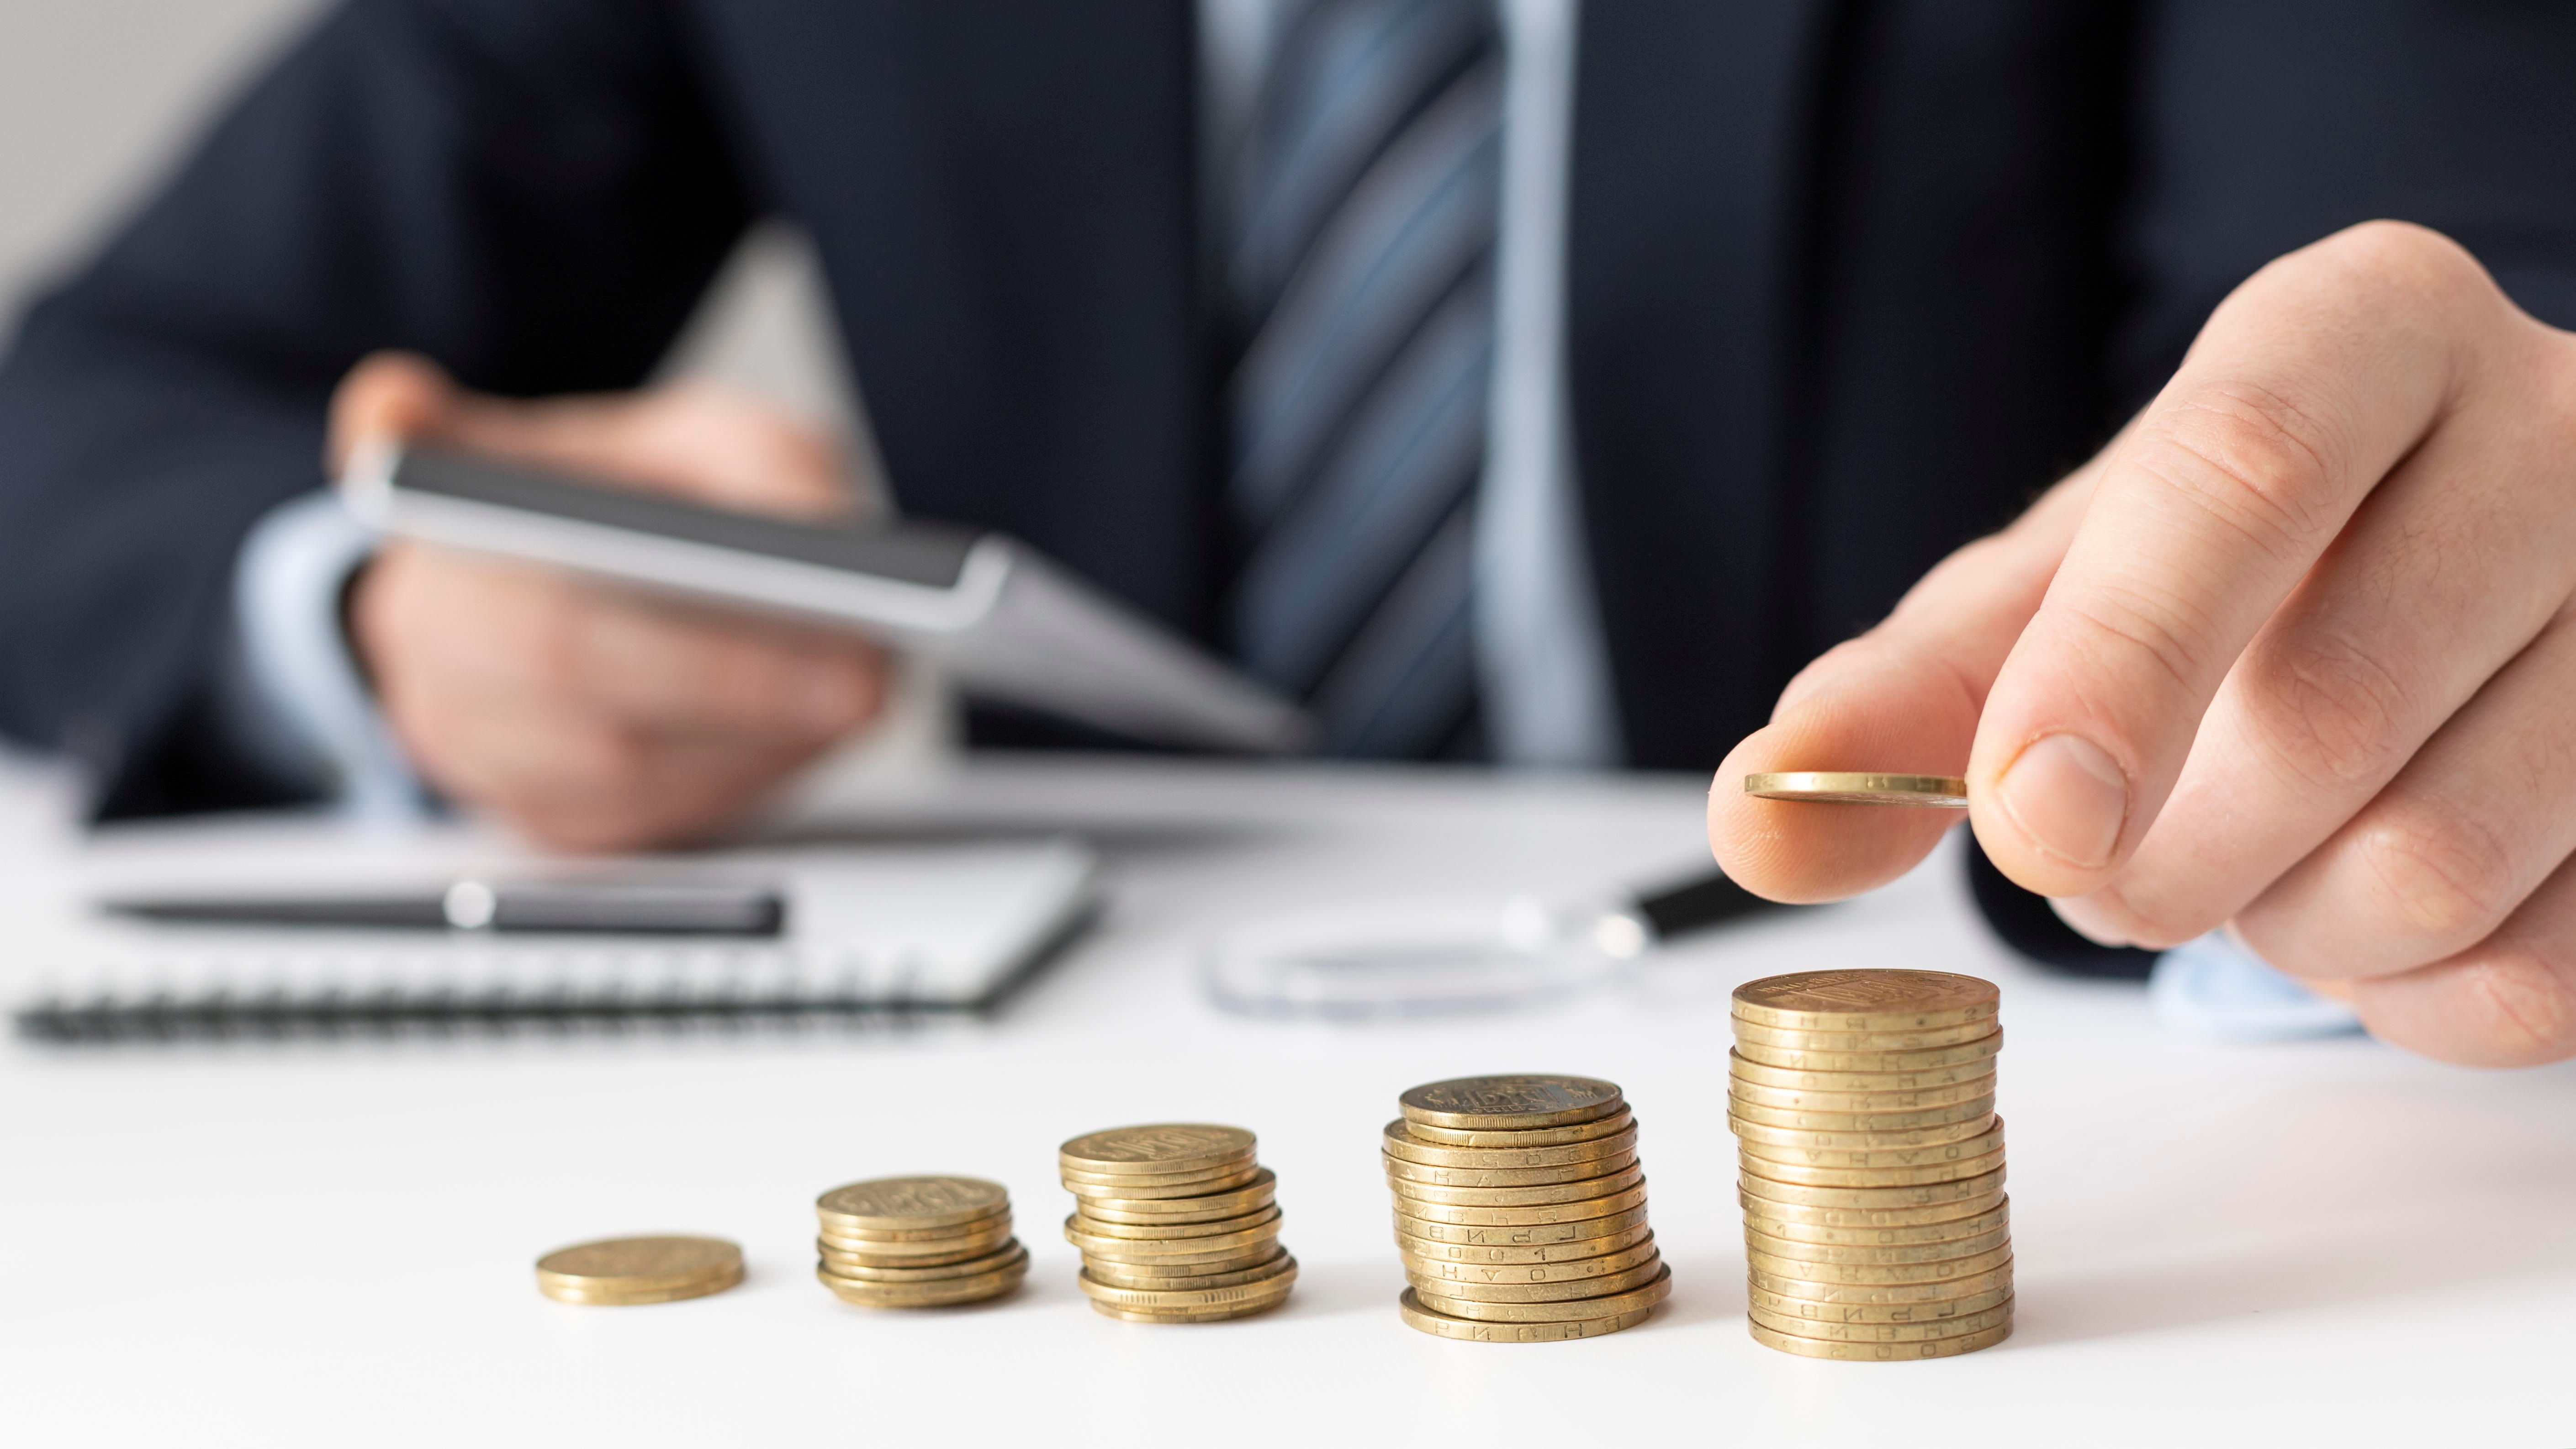

##**Overview Of This Project:**

This project uses the Indian Personal Finance and Spending Habits dataset, which contains detailed information on individuals’ income, expenses, savings goals, and financial behavior across various demographic segments in India. The objective is to predict an individual's potential to save or classify their financial behavior (e.g., high saver, moderate saver, low saver) based on features such as income, occupation, city tier, and expenditure patterns. This analysis aims to provide actionable insights into personal budgeting and help build models that can support financial advisory tools, targeted savings recommendations, and policy-making for financial inclusion.

##**Use Of This Dataset:**


This dataset is ideal for analyzing personal finance patterns and spending habits across diverse demographic groups in India. It offers valuable insights into how factors like income, age, occupation, city tier, and number of dependents influence household expenditures and savings behavior. The dataset can be used to identify trends in budgeting, evaluate the effectiveness of different saving strategies, and assess the impact of lifestyle choices on financial outcomes. It is also well-suited for predictive modeling—such as forecasting savings potential, classifying financial profiles, and clustering users based on spending behavior—making it a powerful tool for financial planning, targeted marketing, and policy development.

##**Objective:**


The goal of this project is to study how people in India **Earn**, **Spend**, and **Save Money**.This project can help individuals, banks, or financial apps give better money-saving tips based on a person's lifestyle.

##**Dataset Link :**

https://content/IndianPersonalFianceandSpendingHabits.csv

#**Data Description:**
   - **Source :** kaggle.com
   - **Personal Details :**
        - Age – Age of the person

        - Dependents – Number of dependents in the family

        - Occupation – Type of job (e.g., Student,       Self-Employed, Professional, Retired)
        
        - City_Tier – City classification (Tier 1, Tier 2,   Tier 3)

   - **Income & Fixed Costs :**
    - Income – Monthly income

    - Rent – Monthly rent paid

    - Loan_Repayment – Monthly loan EMIs

    - Insurance – Monthly insurance premium

- **Spending Categories :**
    - Groceries – Monthly groceries expense

    - Transport – Monthly transport cost

    - Eating_Out, Entertainment, Utilities, Healthcare, Education, Miscellaneous - Other regular expenses

- **Savings Data :**
    - Desired_Savings_Percentage – % of income the person wants to save

    - Desired_Savings – Target amount to save

    - Disposable_Income – Money left after all expenses

- **Potential Savings :**
    - Estimated money that could be saved in each category if spending is optimized:

       - Potential_Savings_Groceries, Transport, Eating_Out, Utilities, Entertainment, Healthcare, Education, Miscellaneous.




In [3]:
# Loading Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,precision_score,f1_score,recall_score,roc_curve, auc
from sklearn.model_selection import GridSearchCV
import joblib

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [11]:
df=pd.read_csv('/content/IndianPersonalFianceandSpendingHabits.csv')

In [12]:
df.columns

Index(['Income', 'Age', 'Dependents', 'Occupation', 'City_Tier', 'Rent',
       'Loan_Repayment', 'Insurance', 'Groceries', 'Transport', 'Eating_Out',
       'Entertainment', 'Utilities', 'Healthcare', 'Education',
       'Miscellaneous', 'Desired_Savings_Percentage', 'Desired_Savings',
       'Disposable_Income', 'Potential_Savings_Groceries',
       'Potential_Savings_Transport', 'Potential_Savings_Eating_Out',
       'Potential_Savings_Entertainment', 'Potential_Savings_Utilities',
       'Potential_Savings_Healthcare', 'Potential_Savings_Education',
       'Potential_Savings_Miscellaneous'],
      dtype='object')

##**Statistical informations**

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 27 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Income                           20000 non-null  float64
 1   Age                              20000 non-null  int64  
 2   Dependents                       20000 non-null  int64  
 3   Occupation                       20000 non-null  object 
 4   City_Tier                        20000 non-null  object 
 5   Rent                             20000 non-null  float64
 6   Loan_Repayment                   20000 non-null  float64
 7   Insurance                        20000 non-null  float64
 8   Groceries                        20000 non-null  float64
 9   Transport                        20000 non-null  float64
 10  Eating_Out                       20000 non-null  float64
 11  Entertainment                    20000 non-null  float64
 12  Utilities         

In [15]:
df.describe()

,Income,Age,Dependents,Rent,Loan_Repayment,Insurance,Groceries,Transport,Eating_Out,Entertainment,...,Desired_Savings,Disposable_Income,Potential_Savings_Groceries,Potential_Savings_Transport,Potential_Savings_Eating_Out,Potential_Savings_Entertainment,Potential_Savings_Utilities,Potential_Savings_Healthcare,Potential_Savings_Education,Potential_Savings_Miscellaneous
count,2.000000e+04,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,...,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,4.158550e+04,41.031450,1.995950,9115.494629,2049.800292,1455.028761,5205.667493,2704.466685,1461.856982,1448.853658,...,4982.878416,10647.367257,912.197183,473.042650,254.963280,254.031058,436.332808,41.524964,62.417083,144.904987
std,4.001454e+04,13.578725,1.417616,9254.228188,4281.789941,1492.938435,5035.953689,2666.345648,1481.660811,1489.019270,...,7733.468188,11740.637289,1038.884968,537.222853,296.047943,299.973590,503.200658,53.152458,98.842656,169.160951
min,1.301187e+03,18.000000,0.000000,235.365692,0.000000,30.002012,154.078240,81.228584,39.437523,45.421469,...,0.000000,-5400.788673,16.575501,8.268076,3.797926,3.121610,6.200297,0.001238,0.000000,2.091973
25%,1.760488e+04,29.000000,1.000000,3649.422246,0.000000,580.204749,2165.426419,1124.578012,581.011801,581.632906,...,1224.932636,3774.894323,317.811000,161.913751,84.506870,84.562090,148.013618,11.037421,4.926210,47.637307
50%,3.018538e+04,41.000000,2.000000,6402.751824,0.000000,1017.124681,3741.091535,1933.845509,1029.109726,1020.198376,...,2155.356763,7224.890977,607.038735,307.045856,164.927660,164.740232,285.739582,25.202124,33.127987,93.090257
75%,5.176545e+04,53.000000,3.000000,11263.940492,2627.142320,1787.160895,6470.892718,3360.597508,1807.075251,1790.104082,...,6216.309609,13331.950716,1128.681837,588.419602,313.398240,310.927935,538.983703,52.353736,80.946145,178.257981
max,1.079728e+06,64.000000,4.000000,215945.674703,123080.682009,38734.932935,119816.898124,81861.503457,34406.100166,38667.368308,...,245504.485208,377060.218482,34894.644404,12273.258242,5573.036433,6222.200913,8081.799518,1394.531049,3647.244243,4637.951137


##**Numerical Columns:**

In [19]:
df.isnull().sum() # check the null values in columns

,0
Income,0
Age,0
Dependents,0
Occupation,0
City_Tier,0
Rent,0
Loan_Repayment,0
Insurance,0
Groceries,0
Transport,0


In [17]:
df.duplicated().sum() # check whether there is any duplicated values

np.int64(0)

In [18]:
df.shape

(20000, 27)

#**DATA PREPROCESSING**



Handling missing values by using imputation techniques:

- Mode

- Removing rows/columns with missing data.

In [ ]:
#"Deleting unwanted columns like 'Postal Code','DOL Vehicle ID','2020 Census Tract','Vehicle Location','County','Electric Range','VIN (1-10)'".......

df.drop(columns=['2020 Census Tract','Vehicle Location','Base MSRP','DOL Vehicle ID','Postal Code','VIN (1-10)','County','Electric Range'], inplace=True)